In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from torch.utils.tensorboard import SummaryWriter

from utils.loader import DicomDataset3D

BATCH_SIZE = 2
EPOCHS = 700
device = 'cuda' if torch.cuda.is_available() else 'cpu'
writer = SummaryWriter()

# Use MONAI's 3D UNet implementation
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(8, 16, 32, 64, 128),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)

train_dl = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
validation_dl = DataLoader(DicomDataset3D("data/validation.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.004)

# pos_weight = torch.tensor([70]).to(device)
# criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)
criterion = DiceLoss(include_background=False)


In [2]:
import utils.notebooks as nb
nb.train(model, train_dl, validation_dl, optimizer, criterion, EPOCHS, writer=writer, model_name='monai')

epoch: 0


AssertionError: labels should have a channel with length equal to one.

torch.Size([2, 2, 64, 256, 256])


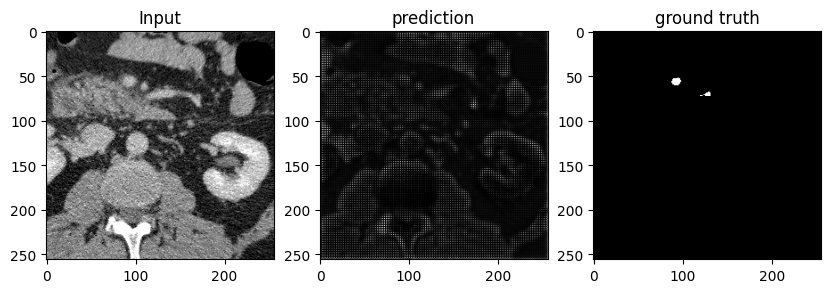

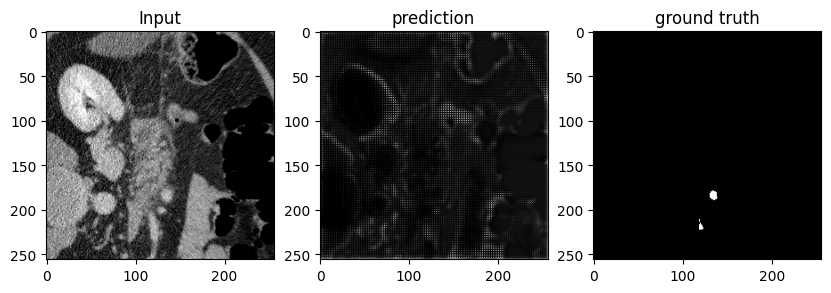

torch.Size([2, 2, 64, 256, 256])


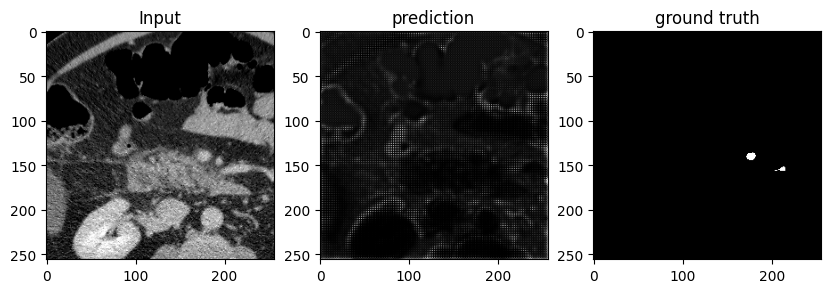

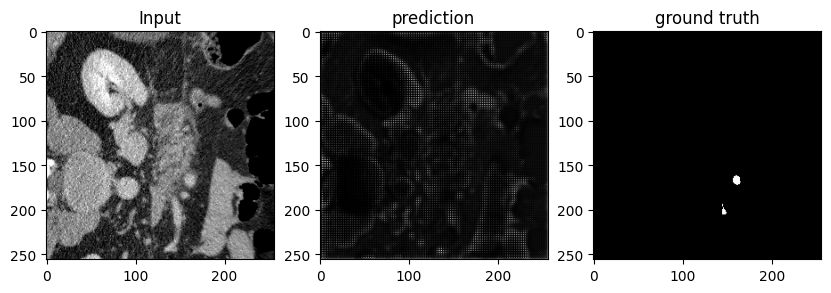

torch.Size([2, 2, 64, 256, 256])


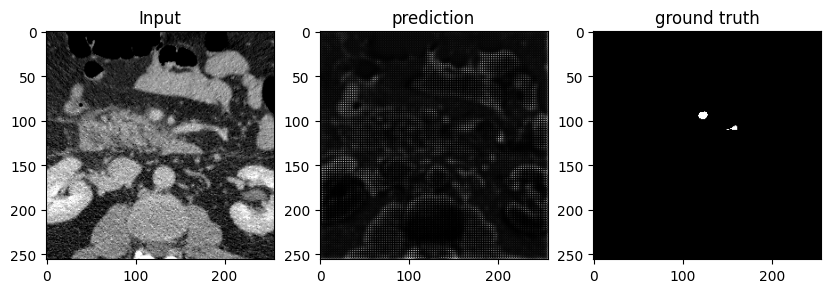

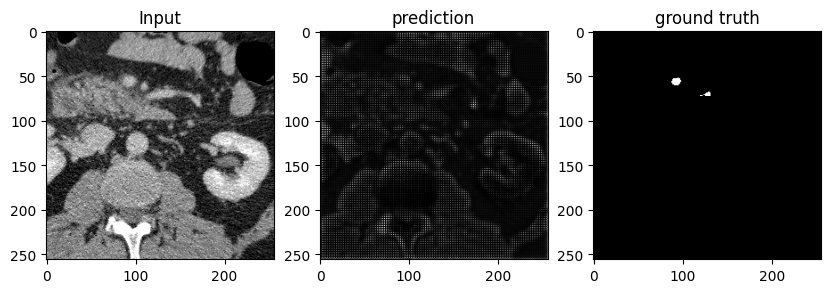

torch.Size([2, 2, 64, 256, 256])


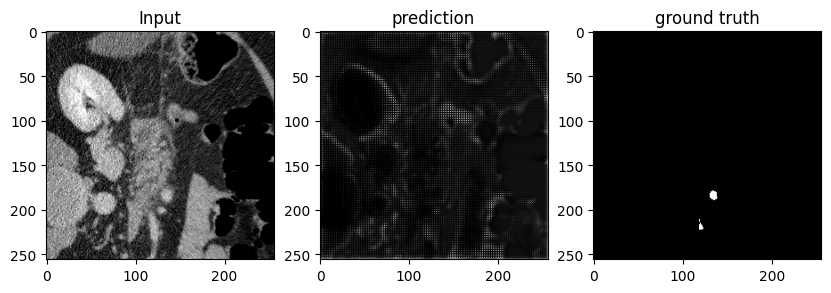

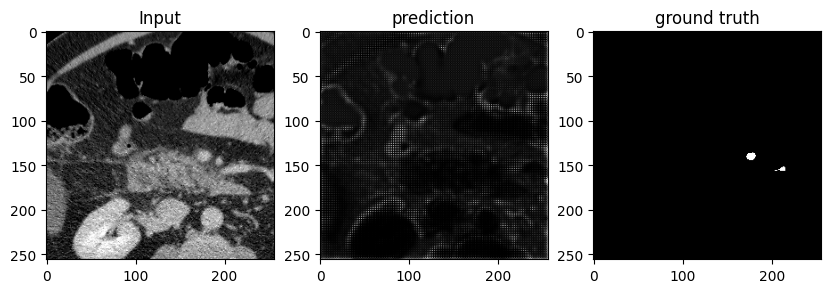

torch.Size([2, 2, 64, 256, 256])


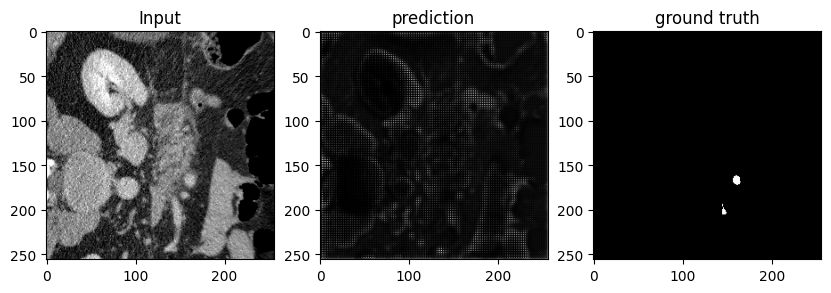

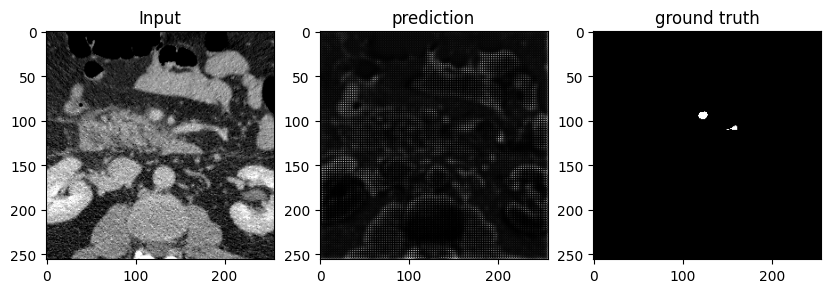

torch.Size([2, 2, 64, 256, 256])


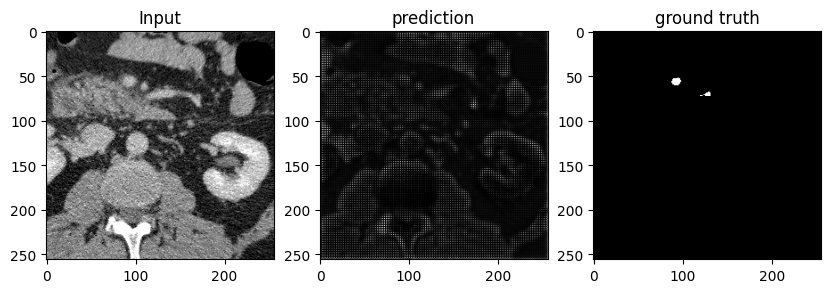

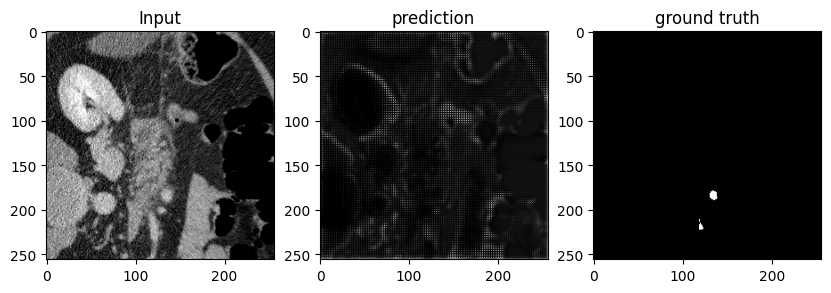

torch.Size([2, 2, 64, 256, 256])


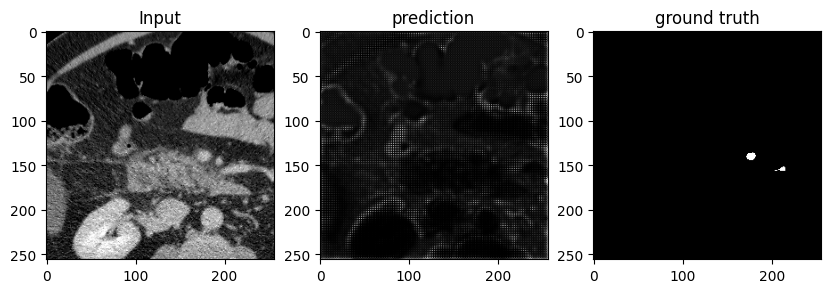

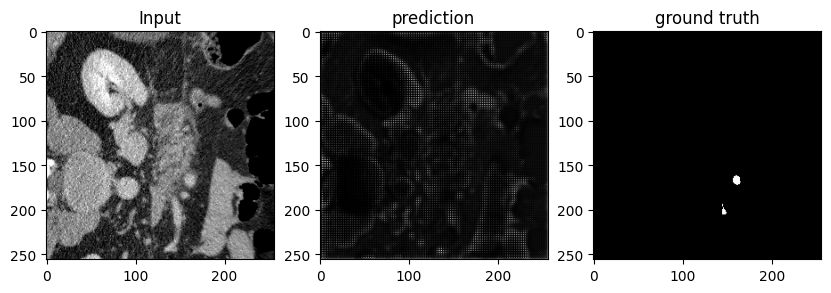

torch.Size([2, 2, 64, 256, 256])


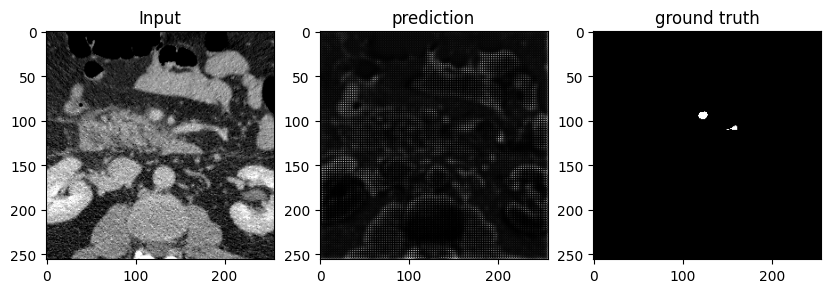

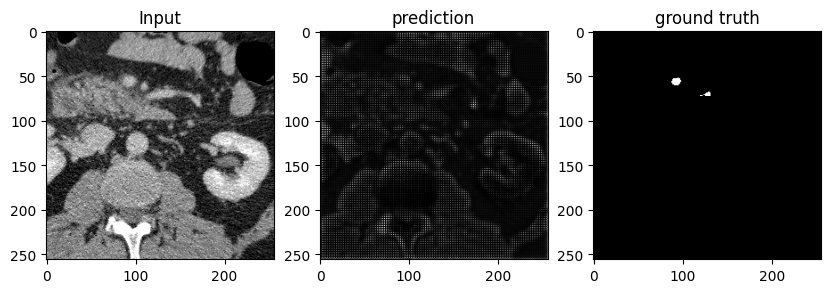

torch.Size([2, 2, 64, 256, 256])


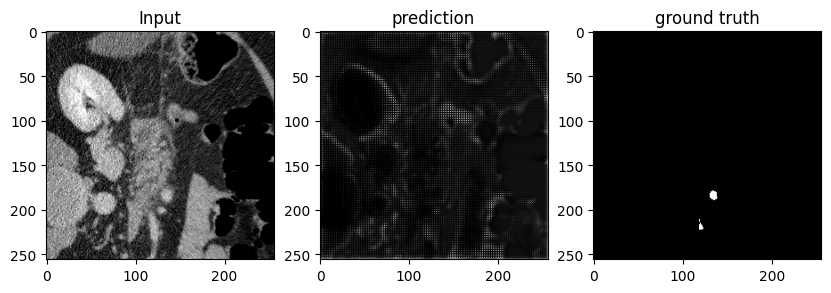

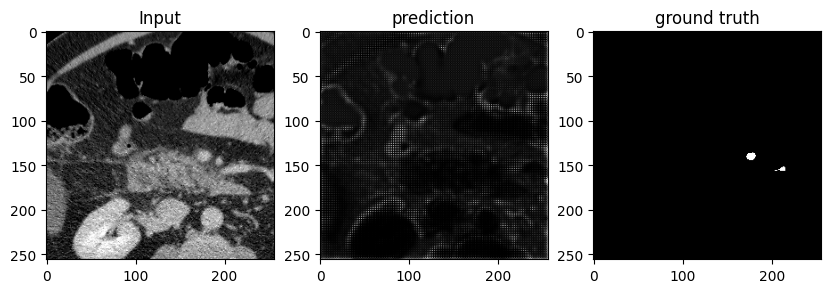

torch.Size([2, 2, 64, 256, 256])


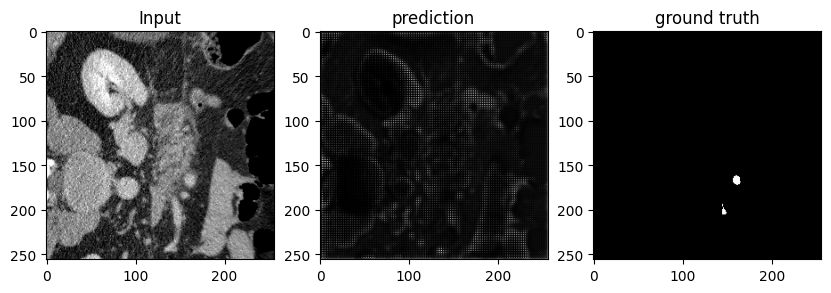

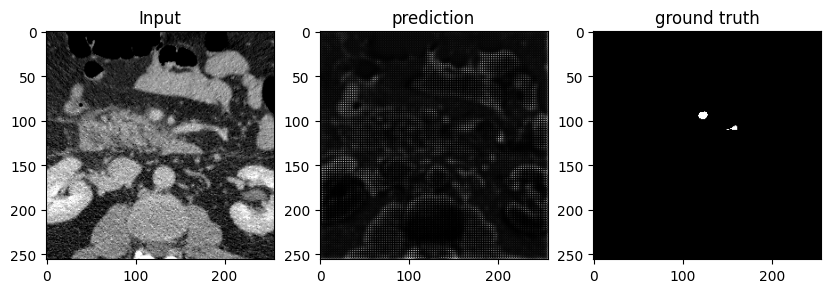

torch.Size([2, 2, 64, 256, 256])


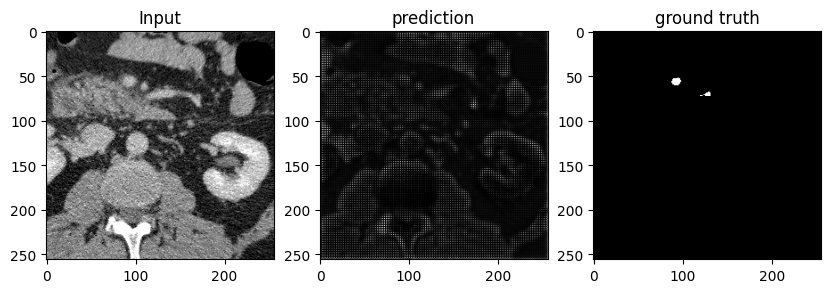

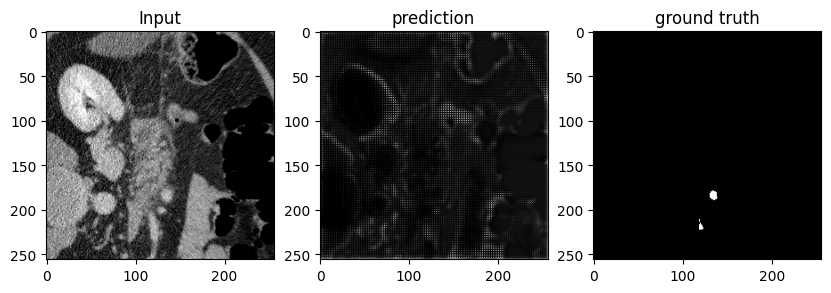

torch.Size([2, 2, 64, 256, 256])


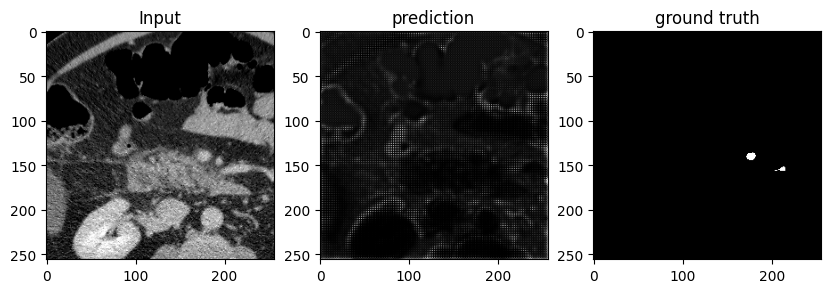

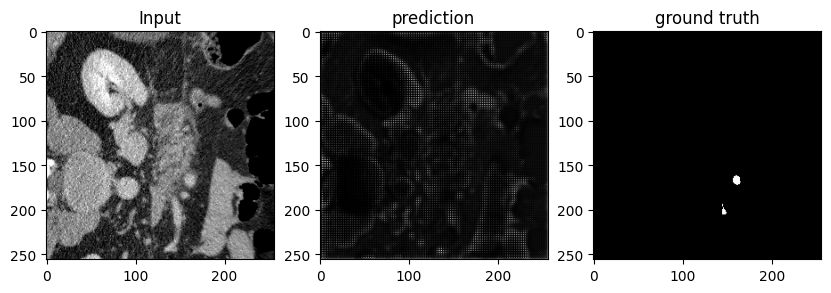

torch.Size([2, 2, 64, 256, 256])


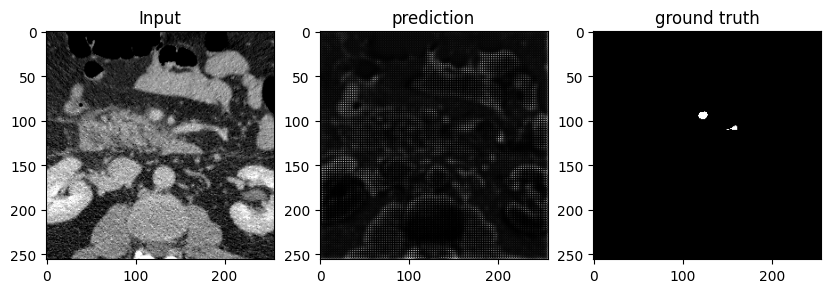

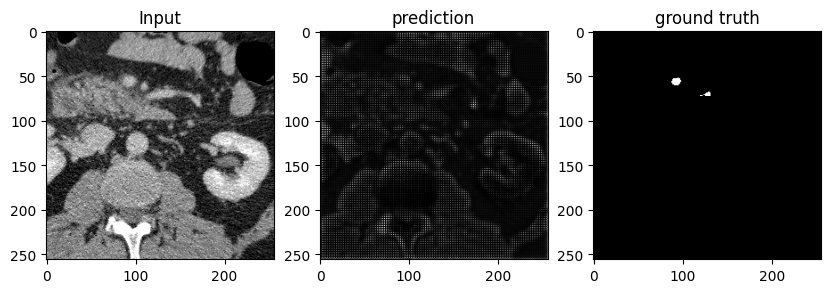

torch.Size([2, 2, 64, 256, 256])


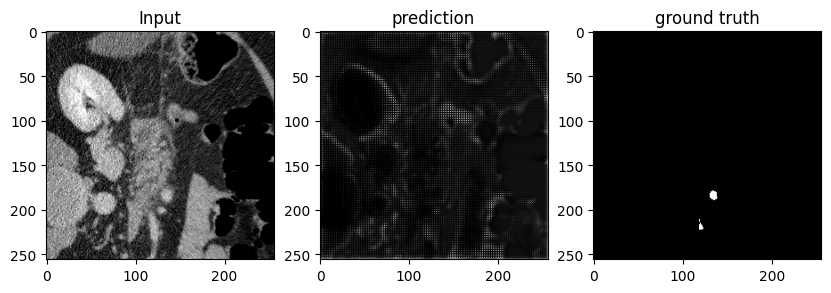

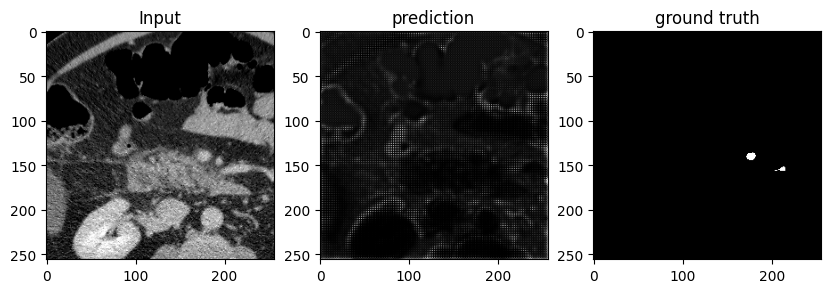

torch.Size([2, 2, 64, 256, 256])


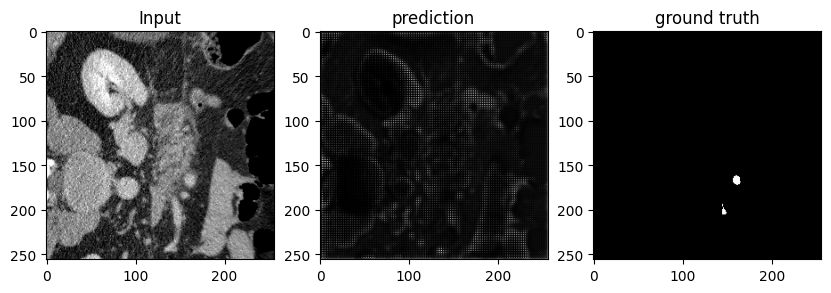

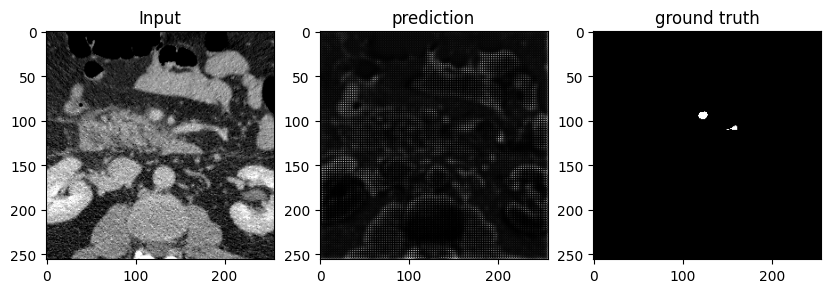

torch.Size([2, 2, 64, 256, 256])


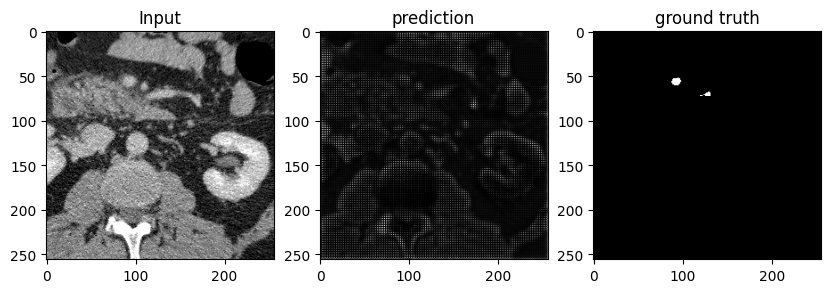

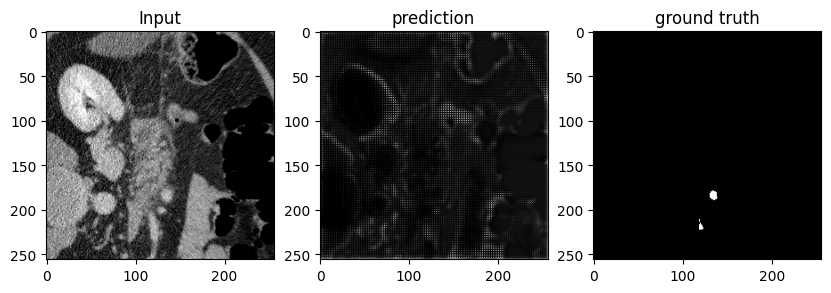

torch.Size([2, 2, 64, 256, 256])


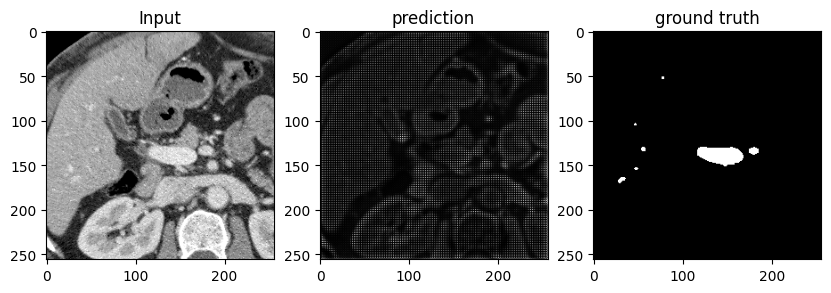

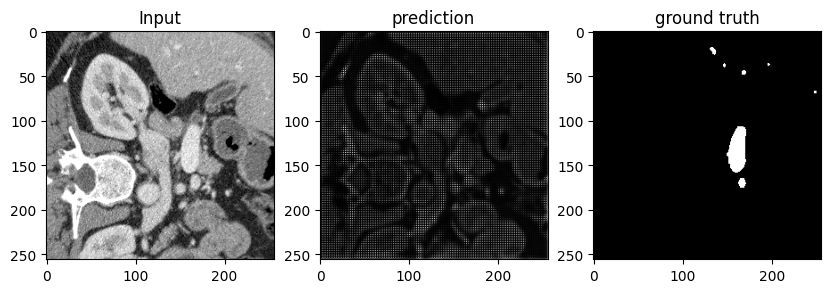

torch.Size([2, 2, 64, 256, 256])


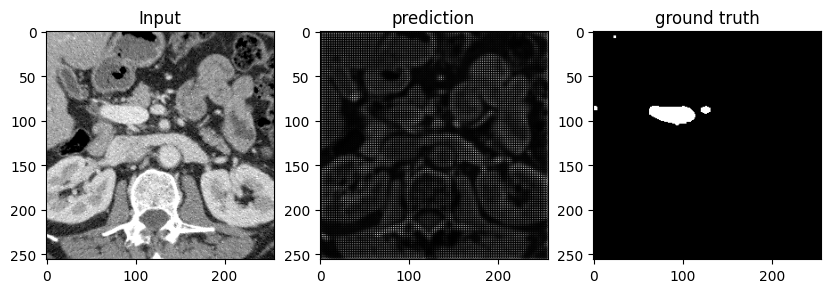

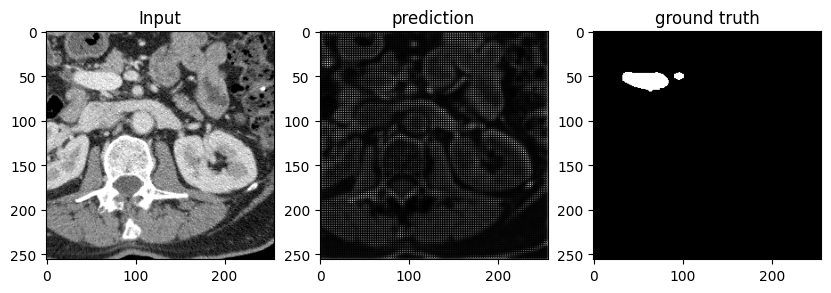

torch.Size([2, 2, 64, 256, 256])


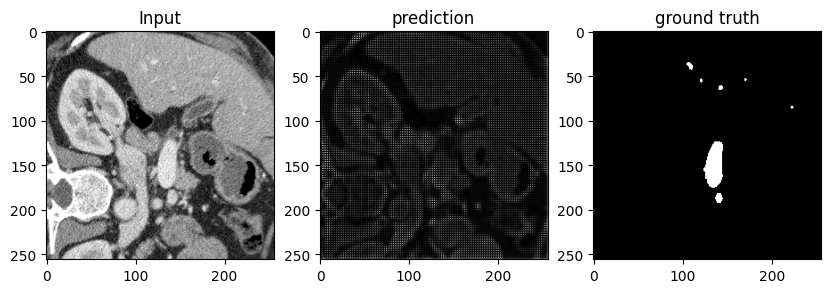

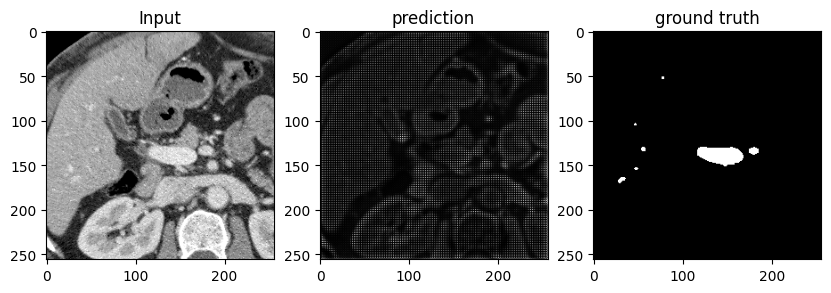

torch.Size([2, 2, 64, 256, 256])


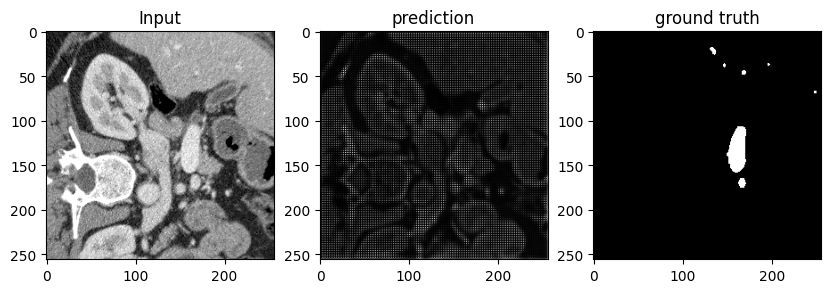

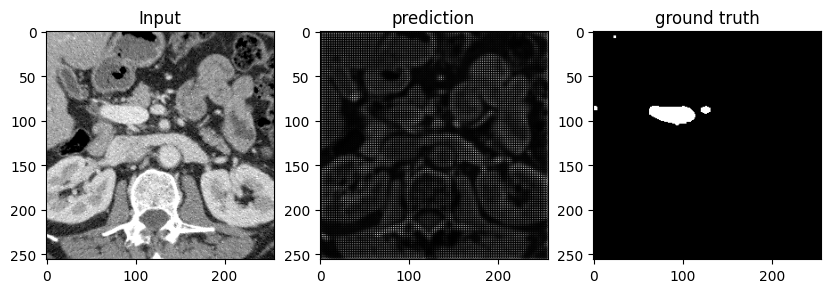

KeyboardInterrupt: 

In [ ]:
import importlib
import utils.notebooks as nb
importlib.reload(nb)

nb.plot_predictions(test_dataloader, model)